파일 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/soccer player pay/FIFA_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/soccer player pay/FIFA_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/soccer player pay/submission.csv')

# 1. EDA

[파일]
1. FIFA_train.csv : 축구선수의 정보와 능력치 그리고 이적시장 가격이 포함된 데이터
2. FIFA_test.csv : 축구선수의 정보와 능력치가 포함된 데이터 해당 데이터의 선수들의 이적료를 예측해 주시면 됩니다.
3. submission.csv : 답안지의 형식

FIFA_train.csv
1. id : 선수 고유의 아이디
2. name : 이름
3. age : 나이
4. continent : 선수들의 국적이 포함되어 있는 대륙입니다
5. contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
6. position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
7. prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
8. reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
9. stat_overall : 선수의 현재 능력치 입니다.
10. stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
11. stat_skill_moves : 선수의 개인기 능력치 입니다.
12. value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다.

[제출 파일의 형식]
submission.csv : 선수들의 아이디와 그에맞는 이적료가격을 기입하여 제출하여 주시기 바랍니다.

1. id : 선수 고유의 아이디
2. value : 예측된 선수 이적 시장 가격을 기입 

In [ ]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


# 2. 데이터 전처리

결측값은 없는 것으로 파악된다.

In [ ]:
print(train.shape)
print(test.shape)
print(submission.shape)

(8932, 12)
(3828, 11)
(3828, 2)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
train.corr()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,1.000000,-0.475785,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280
age,-0.475785,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,-0.423739,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,-0.972374,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.630199,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,-0.402455,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,-0.544280,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


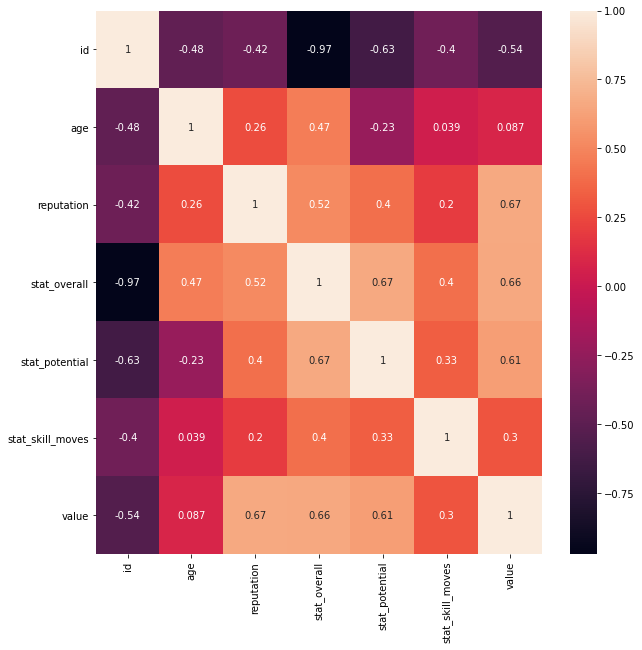

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)

value와 관계가 높은 것은 stat_potential, stat_overall, reputation 이 세가지를 특성으로 잡고 모델링을 진행할 것이다.

# 3. 변수 선택 및 모델 구축
Feature Engineering & Initial Modeling

In [ ]:
features = ['reputation', 'stat_overall','stat_potential']
X_train = train[features]
y_train = train['value']
X_test = test[features]

랜덤 포레스트 모델 구축

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(bootstrap=True, n_estimators=200, max_depth=5, random_state=0)

# 5. 모델 학습 및 검증
Model Tuning & Evaluation

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

모델 예측하기

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
submission['value'] = y_pred
submission.to_csv('model.csv', index=False)

In [ ]:
submission

,id,value
0,1,9.412775e+07
1,2,7.150148e+07
2,4,6.127439e+07
3,5,6.150698e+07
4,6,6.150698e+07
...,...,...
3823,16924,1.693312e+05
3824,16929,1.693312e+05
3825,16932,1.693312e+05
3826,16937,1.693312e+05
